In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

## Demo \#1

$$ f(0) = 0; \qquad f'(x) = x $$

In [4]:
# Define f'(x) = x
def fp(x):
    return x

# Define f(x)
def f(x):
    return 0.5*x**2

# Define x0 and f(0)
x0 = 0
f0 = f(x0)

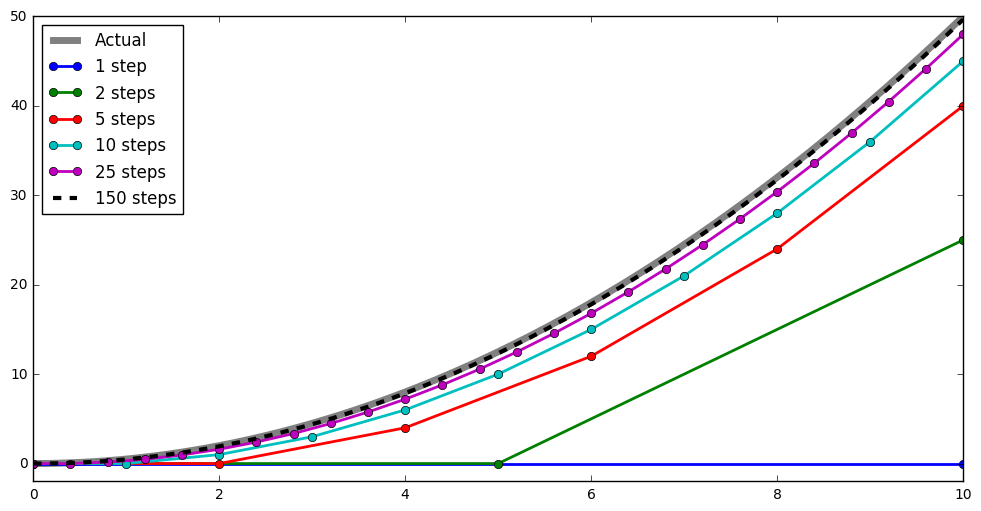

In [5]:
ns = [2,3,6,11,26,151]
xs = []
ys = []

for iin in range(len(ns)):
    n = ns[iin]
    x = np.linspace(0,10,n)
    y = np.zeros(x.shape)
    y[0] = f0
    
    for ii in range(1,n):
        y[ii] = y[ii-1] + (x[ii]-x[ii-1])*fp(x[ii-1])
        
    xs += [x]
    ys += [y]

plt.figure(figsize=(12,6))
plt.plot(xs[5],f(xs[5]), '-k', label='Actual',color=[0.5,0.5,0.5],linewidth=5)
plt.plot(xs[0],ys[0],'-o',label='1 step',linewidth=2)
plt.plot(xs[1],ys[1],'-o',label=r'{0:d} steps'.format(ns[1]-1),linewidth=2)
plt.plot(xs[2],ys[2],'-o',label=r'{0:d} steps'.format(ns[2]-1),linewidth=2)
plt.plot(xs[3],ys[3],'-o',label=r'{0:d} steps'.format(ns[3]-1),linewidth=2)
plt.plot(xs[4],ys[4],'-o',label=r'{0:d} steps'.format(ns[4]-1),linewidth=2)
plt.plot(xs[5],ys[5],'--k',label=r'{0:d} steps'.format(ns[5]-1),linewidth=3)
plt.ylim((-2,50))
plt.legend(loc='best')

## Area Interpretation

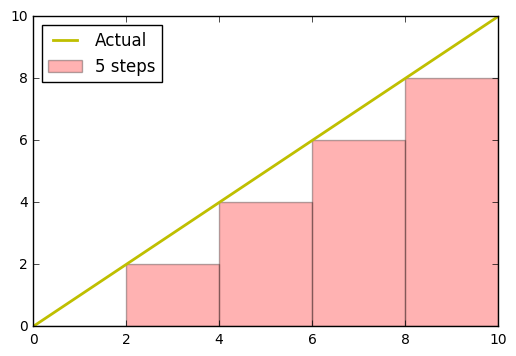

In [7]:
plt.figure(figsize=(6,4))

plt.plot(xs[5],fp(xs[5]), '-y', label='Actual', linewidth=2)

if False:
    tmpx = xs[5][:-1]
    tmpy = fp(tmpx)
    width = xs[5][1]-xs[5][0]
    plt.bar(tmpx, tmpy, width, color='k', alpha=0.9,label=r'{0:d} steps'.format(ns[5]-1))

if False:
    tmpx = xs[4][:-1]
    tmpy = fp(tmpx)
    width = xs[4][1]-xs[4][0]
    plt.bar(tmpx, tmpy, width, color='c', alpha=0.7,label=r'{0:d} steps'.format(ns[4]-1))

if False:
    tmpx = xs[3][:-1]
    tmpy = fp(tmpx)
    width = xs[3][1]-xs[3][0]
    plt.bar(tmpx, tmpy, width, color='g', alpha=0.6,label=r'{0:d} steps'.format(ns[3]-1))

if True:
    tmpx = xs[2][:-1]
    tmpy = fp(tmpx)
    width = xs[2][1]-xs[2][0]
    plt.bar(tmpx, tmpy, width, color='r', alpha=0.3,label=r'{0:d} steps'.format(ns[2]-1))
    
plt.xlim((0,10))

plt.legend(loc='best')

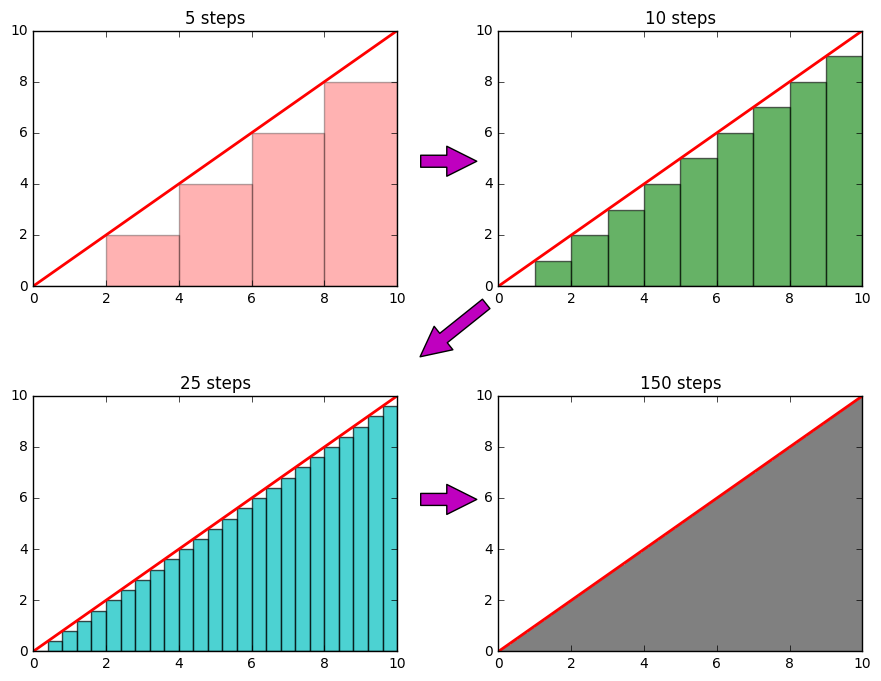

In [8]:
fig = plt.figure(figsize=(10,8))

ax4 = plt.subplot(2,2,4)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[5][:-1]
tmpy = fp(tmpx)
width = xs[5][1]-xs[5][0]
plt.bar(tmpx, tmpy, width, alpha=1.0,label=r'{0:d} steps'.format(ns[5]-1),
       color=[0.5,0.5,0.5], edgecolor = [0.5,0.5,0.5])
plt.title(r'{0:d} steps'.format(ns[5]-1))
plt.xlim((0,10))

ax3 = plt.subplot(2,2,3)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[4][:-1]
tmpy = fp(tmpx)
width = xs[4][1]-xs[4][0]
plt.bar(tmpx, tmpy, width, color='c', alpha=0.7,label=r'{0:d} steps'.format(ns[4]-1))
plt.title(r'{0:d} steps'.format(ns[4]-1))
plt.xlim((0,10))

ax2 = plt.subplot(2,2,2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[3][:-1]
tmpy = fp(tmpx)
width = xs[3][1]-xs[3][0]
plt.bar(tmpx, tmpy, width, color='g', alpha=0.6,label=r'{0:d} steps'.format(ns[3]-1))
plt.title(r'{0:d} steps'.format(ns[3]-1))
plt.xlim((0,10))

ax1 = plt.subplot(2,2,1)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[2][:-1]
tmpy = fp(tmpx)
width = xs[2][1]-xs[2][0]
plt.bar(tmpx, tmpy, width, color='r', alpha=0.3,label=r'{0:d} steps'.format(ns[2]-1))
plt.title(r'{0:d} steps'.format(ns[2]-1))
plt.xlim((0,10))


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((10., 5.)))
ptA2 = figtr.transform(ax1tr.transform((-0.25, 5.)))

ptB1 = figtr.transform(ax1tr.transform((0., 0.)))
ptB2 = figtr.transform(ax2tr.transform((10., 10.)))

ptC1 = figtr.transform(ax2tr.transform((10., 5.)))
ptC2 = figtr.transform(ax3tr.transform((-0.25, 5.)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=5)

## Demo \#2

In [13]:
# Define f'(x) = x
def fp(x):
    return -np.sin(x)

# Define f(x)
def f(x):
    return np.cos(x)

# Define x0 and f(0)
x0 = 0
f0 = f(x0)

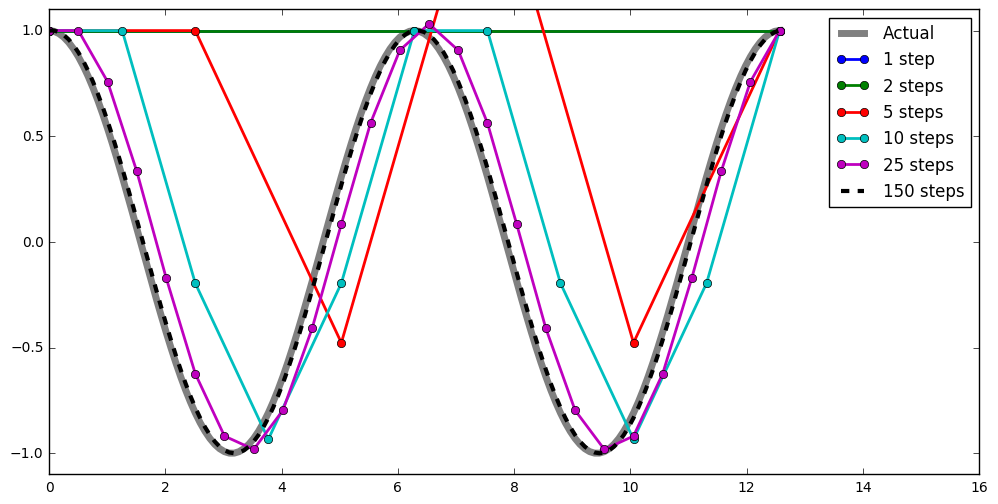

In [14]:
ns = [2,3,6,11,26,151]
xs = []
ys = []

for iin in range(len(ns)):
    n = ns[iin]
    x = np.linspace(0,4*np.pi,n)
    y = np.zeros(x.shape)
    y[0] = f0
    
    for ii in range(1,n):
        y[ii] = y[ii-1] + (x[ii]-x[ii-1])*fp(x[ii-1])
        
    xs += [x]
    ys += [y]

plt.figure(figsize=(12,6))
plt.plot(xs[5],f(xs[5]), '-k', label='Actual',color=[0.5,0.5,0.5],linewidth=5)
plt.plot(xs[0],ys[0],'-o',label='1 step', linewidth=2)
plt.plot(xs[1],ys[1],'-o',label=r'{0:d} steps'.format(ns[1]-1),linewidth=2)
plt.plot(xs[2],ys[2],'-o',label=r'{0:d} steps'.format(ns[2]-1),linewidth=2)
plt.plot(xs[3],ys[3],'-o',label=r'{0:d} steps'.format(ns[3]-1),linewidth=2)
plt.plot(xs[4],ys[4],'-o',label=r'{0:d} steps'.format(ns[4]-1),linewidth=2)
plt.plot(xs[5],ys[5],'--k',label=r'{0:d} steps'.format(ns[5]-1),linewidth=3)
plt.ylim((-1.1, 1.1))
plt.xlim((0,16))
plt.legend(loc='best')

## Area Interpretation

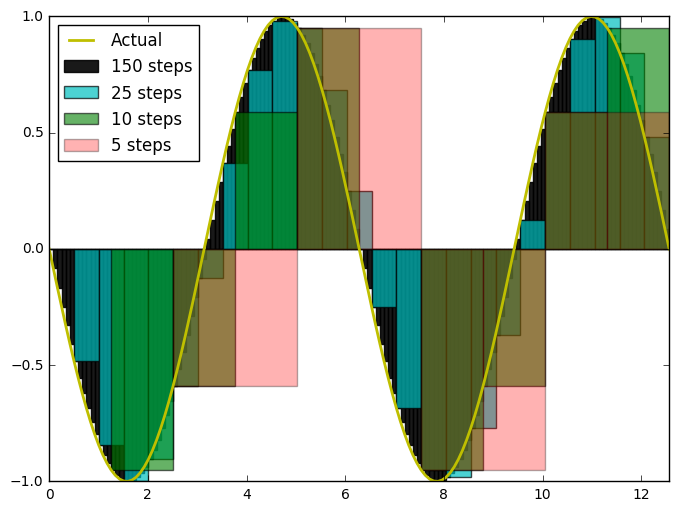

In [9]:
plt.figure(figsize=(8,6))

plt.plot(xs[5],fp(xs[5]), '-y', label='Actual',linewidth=2)

if True:
    tmpx = xs[5][:-1]
    tmpy = fp(tmpx)
    width = xs[5][1]-xs[5][0]
    plt.bar(tmpx, tmpy, width, color='k', alpha=0.9,label=r'{0:d} steps'.format(ns[5]-1))

if True:
    tmpx = xs[4][:-1]
    tmpy = fp(tmpx)
    width = xs[4][1]-xs[4][0]
    plt.bar(tmpx, tmpy, width, color='c', alpha=0.7,label=r'{0:d} steps'.format(ns[4]-1))

if True:
    tmpx = xs[3][:-1]
    tmpy = fp(tmpx)
    width = xs[3][1]-xs[3][0]
    plt.bar(tmpx, tmpy, width, color='g', alpha=0.6,label=r'{0:d} steps'.format(ns[3]-1))

if True:
    tmpx = xs[2][:-1]
    tmpy = fp(tmpx)
    width = xs[2][1]-xs[2][0]
    plt.bar(tmpx, tmpy, width, color='r', alpha=0.3,label=r'{0:d} steps'.format(ns[2]-1))
    
plt.xlim((0,4*np.pi))

plt.legend(loc='best')

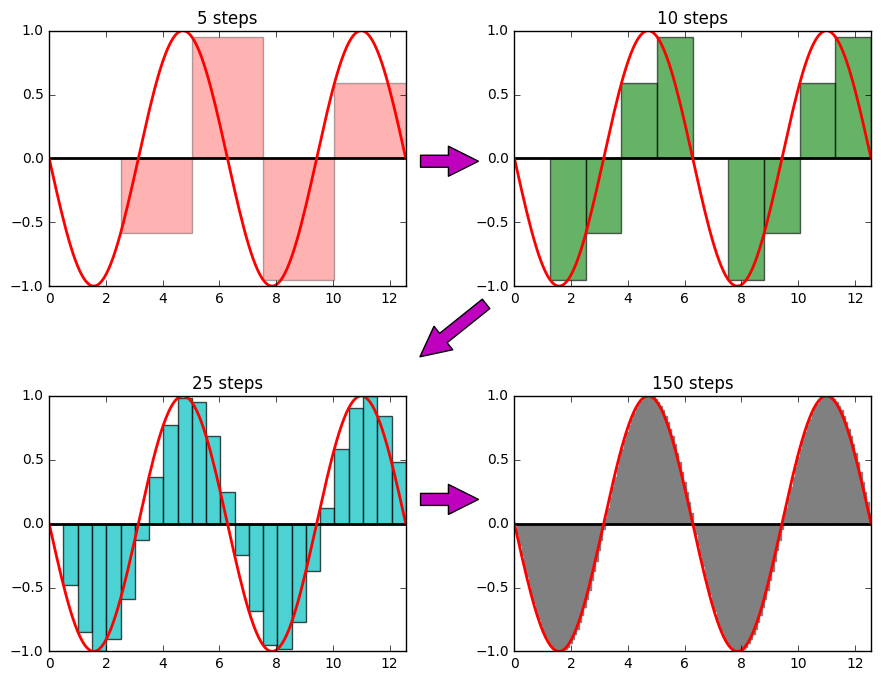

In [10]:
fig = plt.figure(figsize=(10,8))

ax4 = plt.subplot(2,2,4)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[5][:-1]
tmpy = fp(tmpx)
width = xs[5][1]-xs[5][0]
plt.bar(tmpx, tmpy, width, alpha=1.0,label=r'{0:d} steps'.format(ns[5]-1),
       color=[0.5,0.5,0.5], edgecolor = [0.5,0.5,0.5])
plt.title(r'{0:d} steps'.format(ns[5]-1))
plt.xlim((0,4*np.pi))

ax3 = plt.subplot(2,2,3)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[4][:-1]
tmpy = fp(tmpx)
width = xs[4][1]-xs[4][0]
plt.bar(tmpx, tmpy, width, color='c', alpha=0.7,label=r'{0:d} steps'.format(ns[4]-1))
plt.title(r'{0:d} steps'.format(ns[4]-1))
plt.xlim((0,4*np.pi))

ax2 = plt.subplot(2,2,2)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[3][:-1]
tmpy = fp(tmpx)
width = xs[3][1]-xs[3][0]
plt.bar(tmpx, tmpy, width, color='g', alpha=0.6,label=r'{0:d} steps'.format(ns[3]-1))
plt.title(r'{0:d} steps'.format(ns[3]-1))
plt.xlim((0,4*np.pi))

ax1 = plt.subplot(2,2,1)
plt.plot(xs[5],0*xs[5],'k', linewidth=2)
plt.plot(xs[5],fp(xs[5]), '-r', label='Actual', linewidth=2)
tmpx = xs[2][:-1]
tmpy = fp(tmpx)
width = xs[2][1]-xs[2][0]
plt.bar(tmpx, tmpy, width, color='r', alpha=0.3,label=r'{0:d} steps'.format(ns[2]-1))
plt.title(r'{0:d} steps'.format(ns[2]-1))
plt.xlim((0,4*np.pi))


# Create the arrow
ax0tr = ax1.transData 
ax1tr = ax2.transData 
ax2tr = ax3.transData
ax3tr = ax4.transData
figtr = fig.transFigure.inverted() 

ptA1 = figtr.transform(ax0tr.transform((4*np.pi, 0.)))
ptA2 = figtr.transform(ax1tr.transform((-0.25, 0.)))

ptB1 = figtr.transform(ax1tr.transform((0., -1.)))
ptB2 = figtr.transform(ax2tr.transform((4*np.pi, 1.)))

ptC1 = figtr.transform(ax2tr.transform((4*np.pi, 0.)))
ptC2 = figtr.transform(ax3tr.transform((-0.25, 0.)))

arrow12 = matplotlib.patches.FancyArrowPatch(
    ptA1, ptA2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow23 = matplotlib.patches.FancyArrowPatch(
    ptB1, ptB2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)
arrow34 = matplotlib.patches.FancyArrowPatch(
    ptC1, ptC2, transform=fig.transFigure, fc = "m", 
    arrowstyle='simple', mutation_scale=60)

fig.patches.append(arrow12)
fig.patches.append(arrow23)
fig.patches.append(arrow34)

plt.tight_layout(pad=5)